CASE STUDY 02

Hidden Workforce Group Discovery Using Census Data


Load dataset

In [124]:
import pandas as pd

In [125]:
data = pd.read_csv("/content/adult_dataset.csv")

In [126]:
df = data.copy() # taking a copy as df

In [127]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [129]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


PREPROCESSING

Handing Duplicates

Removed to avoid biasing analysis with repeated records.

In [130]:
# Find duplicates
df.duplicated().sum()  # There are few duplicates

np.int64(16)

In [131]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [132]:
# verify if duplicates are removed
df.duplicated().sum()

np.int64(0)

Handling Missing and '?' values

Handled to ensure algorithms can process the data without errors.

In [133]:
# Get percentage of missing values per column
df.isnull().mean()*100

,0
age,5.001434
workclass,6.885676
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,6.875435
relationship,0.000000
race,0.000000
sex,0.000000


In [134]:
# divide numerical columns and categorical columns

num_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns

In [135]:
# importing function  SimpleImputer from lib sklearn and module impute, we can use this function to perform imputation
from sklearn.impute import SimpleImputer#imputing categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [136]:
# Imputing numerical columns with median
num_imputer = SimpleImputer(strategy="median")

df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [137]:
df.isnull().mean()*100  # verify if there are no more missing values

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
education-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0


In [138]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [139]:
# Replacing ? values with mode
for col in cat_cols:
    df[col] = df[col].replace('?', df[col].mode()[0])

Drop Income before clustering

In [140]:
ml_df = df.drop(columns="income" , axis = 1)

In [141]:
ml_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
48838,64.0,Private,321403.0,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


Encoding

Done to convert categorical variables into numeric form for clustering algorithms.

In [142]:
# numerical and categorical cols
num_cols_ml = ml_df.select_dtypes(exclude="object").columns
cat_cols_ml = ml_df.select_dtypes(include="object").columns

In [143]:
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [144]:
# one hot encoding
ml_df = pd.get_dummies(ml_df,columns=cat_cols_ml,drop_first=True, dtype=int )     #drop first removes  first column alphabetically

In [145]:
ml_df.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Outlier Handing

Treated to prevent extreme values from distorting clustering.

In [146]:
# Outliers detection using Visualization - Box plot
import matplotlib.pyplot as plt   # importing libraries
import seaborn as sns

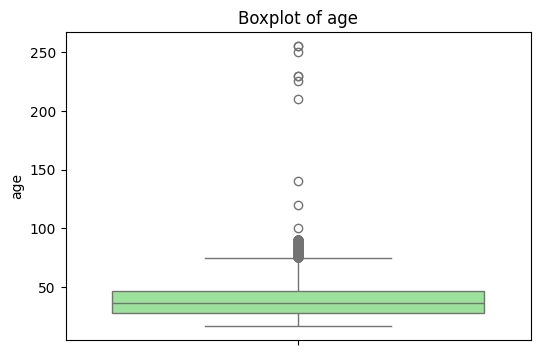

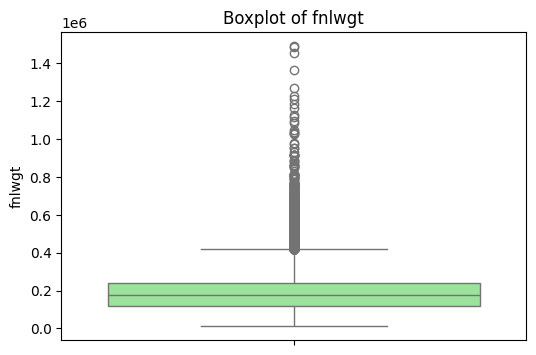

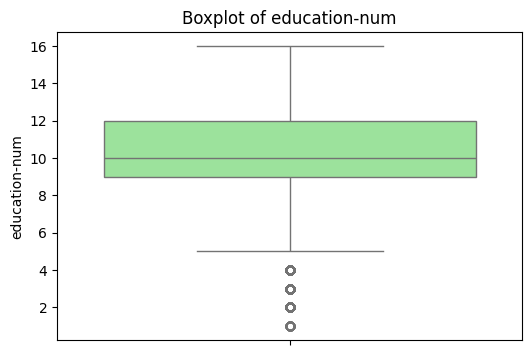

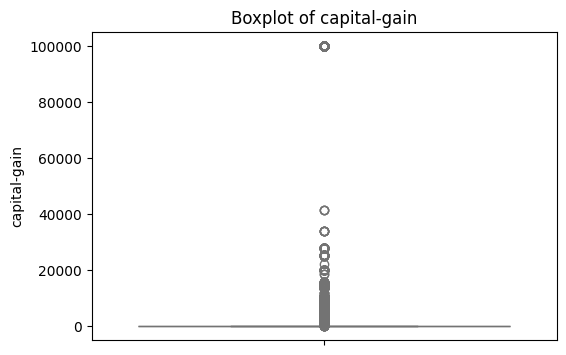

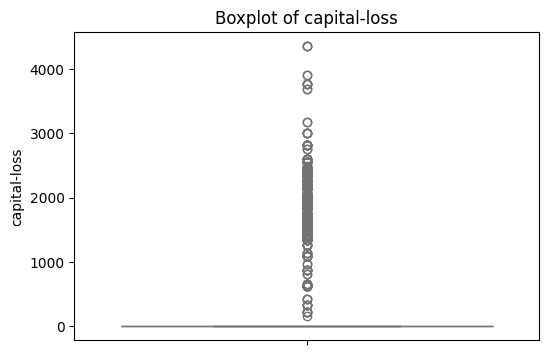

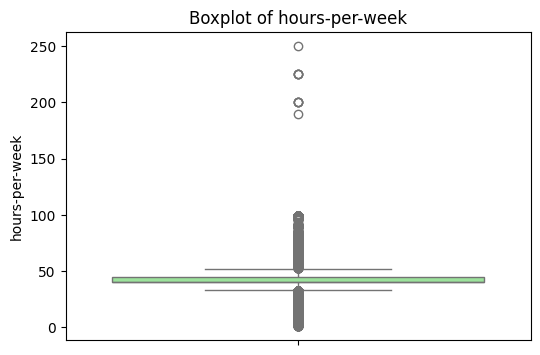

In [147]:
# Plotting box plots for Numerical columns
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [148]:
# we have defined a function for capping outiers

def cap_outliers_numeric(df, numeric_cols):
    """
    Caps outliers in all numeric columns using 1.5*IQR method.
    Modifies the DataFrame in-place to avoid SettingWithCopyWarning.
    """
    for col in numeric_cols:                   #calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR          #define limits
        upper_limit = Q3 + 1.5 * IQR

        # Use .loc to modify safely
        df.loc[:, col] = df[col].clip(lower_limit, upper_limit)   #Replace values

In [149]:
# calling the above defined function

cap_outliers_numeric(ml_df, num_cols_ml)

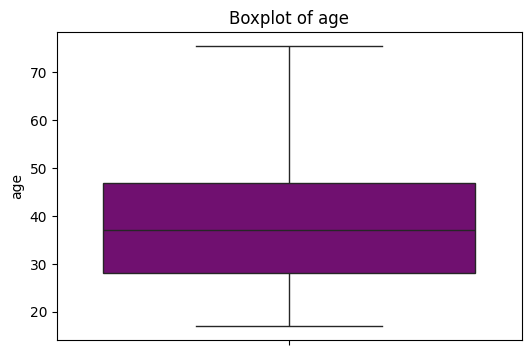

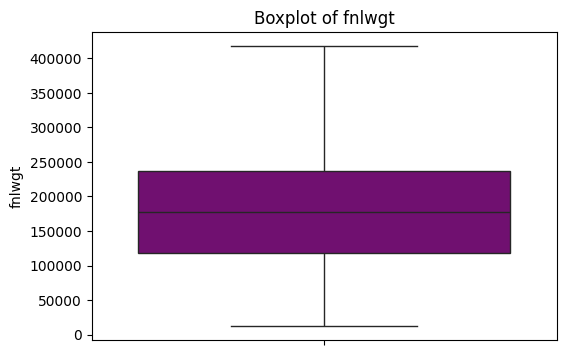

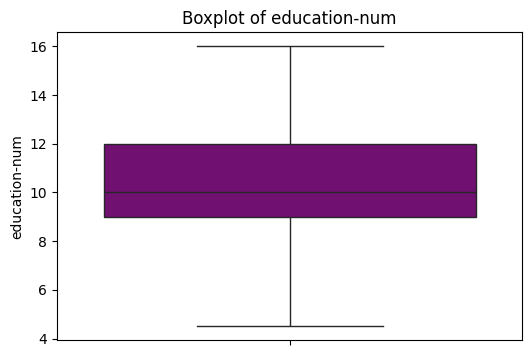

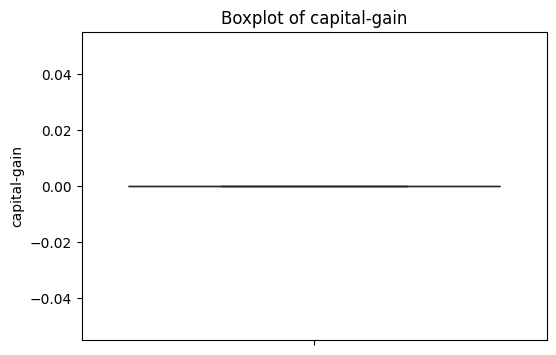

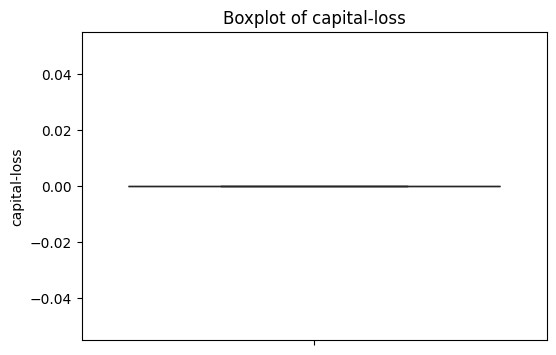

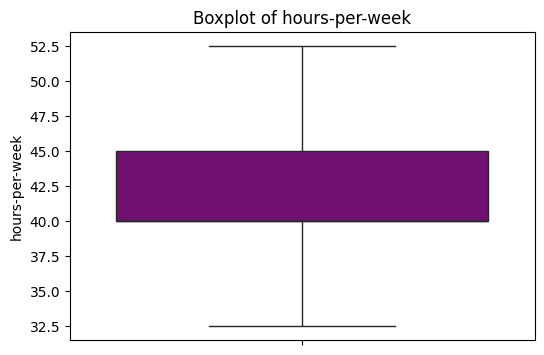

In [150]:
# verify if outliers are handled using box plots
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.show()

Scaling

Applied to normalize feature ranges so distance-based algorithms work properly.

In [151]:
# perform scaling using function StandardScaler from library sklearn and module preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ml_df[num_cols_ml] = scaler.fit_transform(ml_df[num_cols_ml])

Exploratory Data Analysis

Visualize distribution of:
1.   Age
2.   Hours per week
3.   Educational level



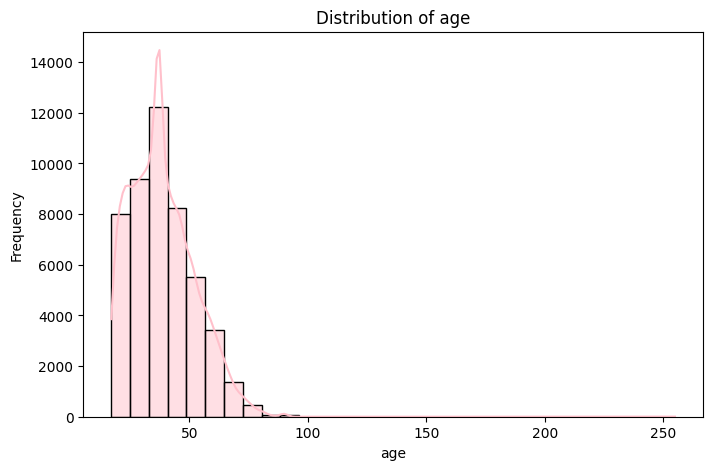

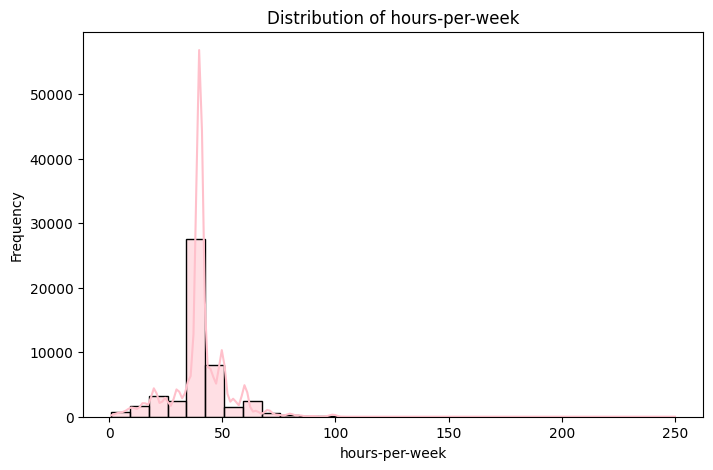

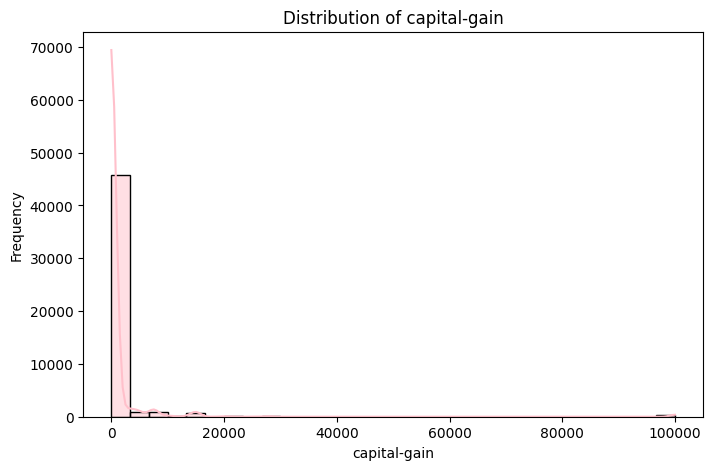

In [152]:
# Plotting Histogram
dist_features = ['age', 'hours-per-week', 'capital-gain']
for feature in dist_features:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=feature, bins=30, kde=True, color="pink")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Identify skewness in capital-gain and capital-loss

In [153]:
ml_df[num_cols_ml].skew()

,0
age,0.530100
fnlwgt,0.555022
education-num,-0.035350
capital-gain,0.000000
capital-loss,0.000000
hours-per-week,0.480415


The skewness for capital-gain and capital loss is zero after outlier handling. From observation this is because most of the values are 0. Hence these coluns do not give much information from clustering , Thus dropping them

In [154]:
ml_df = ml_df.drop(columns=["capital-gain", "capital-loss"],axis  = 1 )

In [155]:
ml_df.head(1)

,age,fnlwgt,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.035123,-1.146152,1.171344,-0.18737,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [156]:
num_cols_ml

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

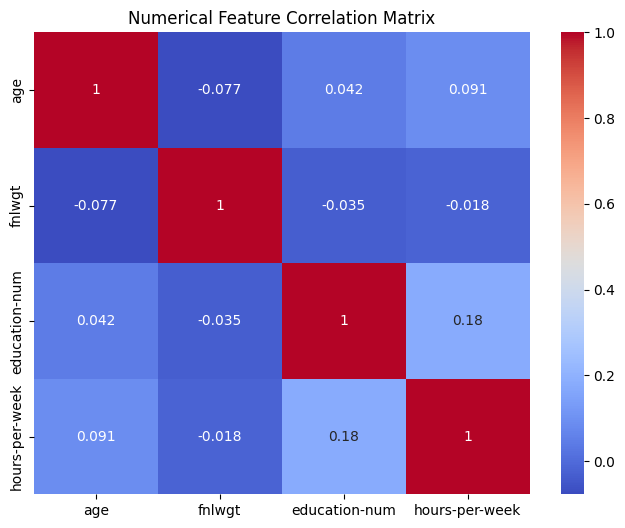

In [157]:
# Find Correlation
corr_cols = ['age', 'fnlwgt', 'education-num','hours-per-week']
# Compute correlation matrix
corr_matrix = ml_df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Numerical Feature Correlation Matrix')
plt.show()


education level and education number seems highly correlated hence dropping education number

In [158]:
ml_df = ml_df.drop(columns='education-num',axis  = 1 )

In [159]:
ml_df.head(1)

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.035123,-1.146152,-0.18737,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


CLUSTERING

K-Means Clustering

In [160]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [161]:
ml_df_km = ml_df.copy()

In [162]:
# Determine optimal K using Elbow Method
inertia = []
K_values = range(1, 11)
for i in K_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(ml_df_km)            # has only featues
    inertia.append(kmeans.inertia_)

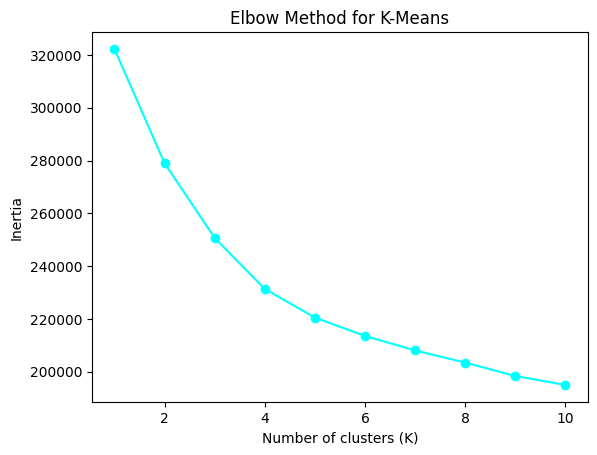

In [163]:
# Plot for Elbow Method
plt.plot(K_values, inertia, marker = "o", color="cyan")
plt.grid
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

From the graph above number of clusters is 4.

In [164]:
kmeans = KMeans(n_clusters=4)
ml_df_km["clusters"]=kmeans.fit_predict(ml_df_km)

In [165]:
ml_df_km.head(5)

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,clusters
0,0.035123,-1.146152,-0.187370,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
1,0.864064,-1.085355,-1.430414,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
2,-0.040236,0.303009,-0.187370,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.090139,0.503130,-0.187370,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
4,-0.793819,1.590950,-0.187370,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
#  Calculate Silhouette Score: Measure how well the clusters are separated.
from sklearn.metrics import silhouette_score
labels_kmeans = kmeans.labels_
score = silhouette_score(ml_df_km, labels_kmeans)
print("Silhouette Score of K Means:", score)

Silhouette Score of K Means: 0.19321110810902065


##Agglomerative Clustering could not be performed because the system ran out of memory and crashed.

DBSCAN

In [167]:
ml_df_db = ml_df.copy()

In [168]:
# Number of Columns
ml_df_db.shape[1]

94

min_sample is number of columns + 1, ie 95

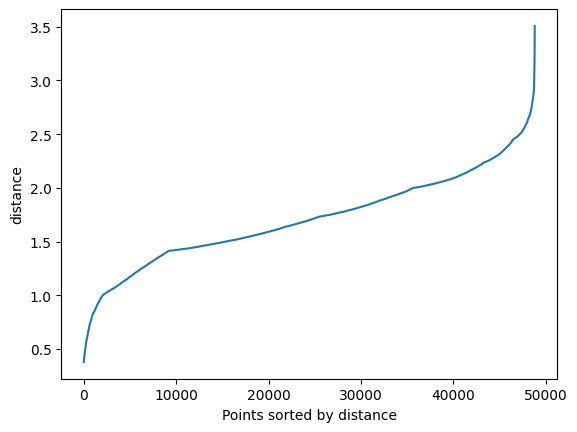

In [181]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=95)
neighbors_fit = neighbors.fit(ml_df_db)
distances, indices = neighbors_fit.kneighbors(ml_df_db)

# Sort distances of each point to its 95th nearest neighbor
distances = np.sort(distances[:, 94])
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("distance")
plt.show()

from the y value at knee taking eps as 2.5 approx

In [183]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.5 ,min_samples=95)
labels = db.fit_predict(ml_df_db)

# Add labels to DataFrame
ml_df_db['cluster_db'] = labels

In [184]:
#Evaluate Clustering
# Silhouette Score: Measure how well the clusters are separated.

labels = db.labels_
score = silhouette_score(ml_df_db, labels)
print("Silhouette Score of DB Scan:", score)

Silhouette Score of DB Scan: 0.22742481378228632


In [185]:
# Identify Noise
# Noise points have label -1
noise_points = ml_df_db[ml_df_db['cluster_db'] == -1]

print("Number of noise points:", len(noise_points))
print(noise_points.head())

Number of noise points: 32
           age    fnlwgt  hours-per-week  workclass_Local-gov  \
1291  1.843723  2.422919       -1.430414                    0   
5435  1.014781  1.293375       -1.430414                    0   
5592 -0.643103  0.739960       -0.187370                    0   
6952 -0.115594  1.009681        1.884368                    0   
7059  0.487273  0.994584        1.470021                    0   

      workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
1291                       0                  0                       0   
5435                       0                  1                       0   
5592                       0                  0                       0   
6952                       0                  0                       1   
7059                       0                  1                       0   

      workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
1291                           1                   

KMeans (Silhouette Score: 0.193)

Produces moderately well-separated clusters.

All points are assigned to clusters, so there is no distinction for outliers.

Assumes clusters are roughly spherical, which can sometimes force overlapping points into the same cluster.

Useful for broad workforce segmentation, like separating workers by hours, experience, or education level.

DBSCAN (Silhouette Score: 0.227)

Slightly higher silhouette score, indicating better separation and more compact clusters.

Automatically detects dense groups and labels sparse points as noise (-1).

Can handle arbitrary cluster shapes, not just spherical ones.

Useful for identifying natural subgroups and outliers, like irregular or rare worker profiles.


PCA

In [186]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #here dimentionality reduces from 4 to 2
pca_feature=pca.fit_transform(ml_df)

In [187]:
pca_feature=pd.DataFrame(pca_feature,columns=["pc1","pc2"])#  converting to dataframe
pcafeature=pca_feature.copy()
pcafeature.head(2)

,pc1,pc2
0,0.053658,-1.077061
1,0.592265,-1.588659


In [188]:
pcafeature["cluster"]=ml_df_km['clusters']    # adding clusters from kmeans

In [189]:
pcafeature.head(2)

,pc1,pc2,cluster
0,0.053658,-1.077061,3.0
1,0.592265,-1.588659,2.0


In [190]:
pcafeature2=pca_feature.copy()
pcafeature2["cluster"]=ml_df_db['cluster_db']    # adding clusters from DBSCAN
pcafeature2.head(2)

,pc1,pc2,cluster
0,0.053658,-1.077061,0.0
1,0.592265,-1.588659,0.0


 Plot a 2D scatter plot:

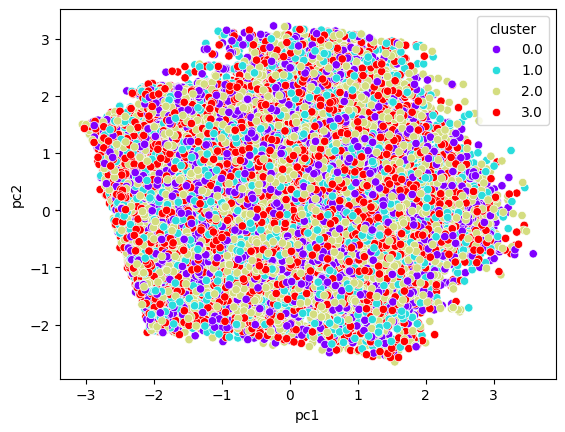

In [191]:
#  Color-code points using cluster labels from:  K-Means
sns.scatterplot(x="pc1",y="pc2",data=pcafeature,hue="cluster",palette='rainbow')
plt.show()

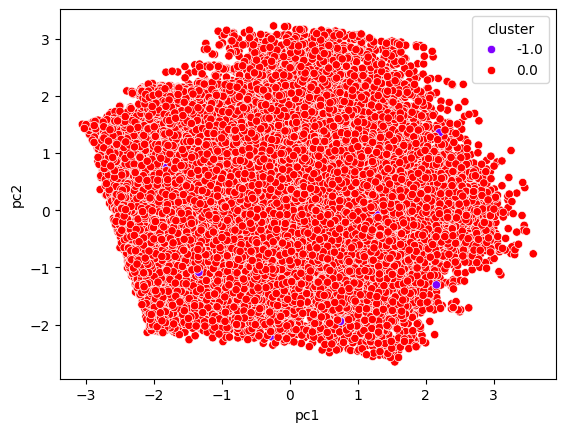

In [192]:
#  Color-code points using cluster labels from:  DBSCAN
sns.scatterplot(x="pc1",y="pc2",data=pcafeature2,hue="cluster",palette='rainbow')
plt.show()

In [193]:
# Explained Variance Ratio
pca.explained_variance_ratio_

array([0.19902819, 0.15181963])

1. How Much Variance is Captured by the First Two Components?

First component: 19.9% of total variance

Second component: 15.2% of total variance

Total variance captured by 2 PCs:
0.199 + 0.152 ≈ 0.351 or 35.1%

Interpretation:

Only about one-third of the dataset's variance is captured in 2D

This means the PCA scatter plot is a simplified view, not full representation

Overlap in 2D may exist even if clusters are more distinct in high-dimensional space

2. Are Clusters Clearly Separable in PCA Space?

No, With 35% variance captured, clusters may appear partially overlapping.


